In [6]:
import pandas as pd
df = pd.DataFrame([["green" , "M" , 10.1 ,"shirts"],
             ["red", "L", 13.5 , "hat"],
             ["blue" , "XL" , 15.3 ,"shirts" ]],
             columns = ["color","size","price","category"])
df

,color,size,price,category
0,green,M,10.1,shirts
1,red,L,13.5,hat
2,blue,XL,15.3,shirts


In [7]:
# 카테고리를 0 과 1로 변경  
df_ = df.copy()
df_["category"]= df_["category"].map({"shirts" : 0 , "hat" : 1})
df_

,color,size,price,category
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [8]:
# 만약 카테고리가 많으면  일일이 지정어려우니 
# LabelEncoder 를 이용해 바꿔줌. 

from sklearn.preprocessing import LabelEncoder
df_ = df.copy()
le = LabelEncoder() 
y = le.fit_transform(df_["category"].values)#label인코더가 category에 카테고리 싹본뒤 번호를 매겨줌.
# fit 하고 transform 미래에 들어온 데이터가 있을경우 따로 해주기 위함

In [9]:
#다시 역변환해서 숫자에서 다시 문자열로 변경해줌
le.inverse_transform([0,0,1,0,1,1]) #역 변환 

array(['hat', 'hat', 'shirts', 'hat', 'shirts', 'shirts'], dtype=object)

In [10]:
#옷 사이즈를 M L XL 순서를 1 0 2 로 함. (순서를 마음대로 정함) 그래서 대소관계가 있더라도 순서를 정하기떄문에 map함수써야함.! 
size_le = LabelEncoder() 
df_["size"] = size_le.fit_transform(df_["size"].values)
df_

,color,size,price,category
0,green,1,10.1,shirts
1,red,0,13.5,hat
2,blue,2,15.3,shirts


In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output= False)
ohe.fit_transform(df_["color"].values.reshape(-1,1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
pd.get_dummies(df_.iloc[: , :-1])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,0,13.5,0,0,1
2,2,15.3,1,0,0


In [13]:
pd.get_dummies(df_.iloc[:,:-1], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,0,13.5,0,1
2,2,15.3,0,0


In [14]:
df_["size"] = df_["size"].map({"M":0 , "L":1 , "XL" :2})
df_

,color,size,price,category
0,green,NaN,10.1,shirts
1,red,NaN,13.5,hat
2,blue,NaN,15.3,shirts


In [15]:
X_df = pd.get_dummies(df_.iloc[:,:-1], drop_first=True)
X_df

,size,price,color_green,color_red
0,NaN,10.1,1,0
1,NaN,13.5,0,1
2,NaN,15.3,0,0


In [16]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import numpy as np 

std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(X_df.loc[:, ["price"]])

mm_scaler = MinMaxScaler()
X2 = mm_scaler.fit_transform(X_df.loc[:, ["size"]])

# X_df.loc[: , "color_green" : "color_red"]
X3 = X_df.loc[: , "color_green":].values
X = np.concatenate([X1 , X2 , X3], axis = -1)

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [17]:
X1

array([[-1.32954369],
       [ 0.24735697],
       [ 1.08218672]])

In [18]:
X2

array([[nan],
       [nan],
       [nan]])

In [19]:
X3

array([[1, 0],
       [0, 1],
       [0, 0]], dtype=uint8)

In [20]:
X

array([[-1.32954369,         nan,  1.        ,  0.        ],
       [ 0.24735697,         nan,  0.        ,  1.        ],
       [ 1.08218672,         nan,  0.        ,  0.        ]])

In [21]:
#불균형 학습
!pip install imbalanced_learn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples= 10000, n_features = 5,
                    weights = [0.99], flip_y = 0 , random_state=1)


In [23]:
np.unique(y , return_counts= True)

(array([0, 1]), array([9900,  100], dtype=int64))

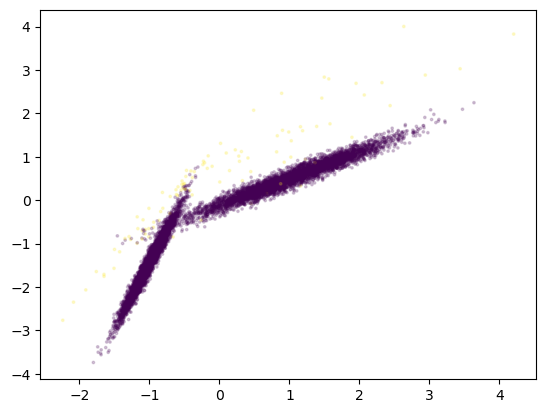

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0], X[: ,1] ,c = y , s = 3 , alpha= 0.2 )
plt.show()

# 2. Imbalanced data
Under Sampling

In [2]:
from sklearn.datasets import make_classification

In [25]:
X, Y = make_classification(n_samples= 10000,
                           n_features= 5,
                           weights= [0.99],
                           flip_y= 0,
                           random_state= 1)

In [26]:
np.unique(Y, return_counts= True)

(array([0, 1]), array([9900,  100], dtype=int64))

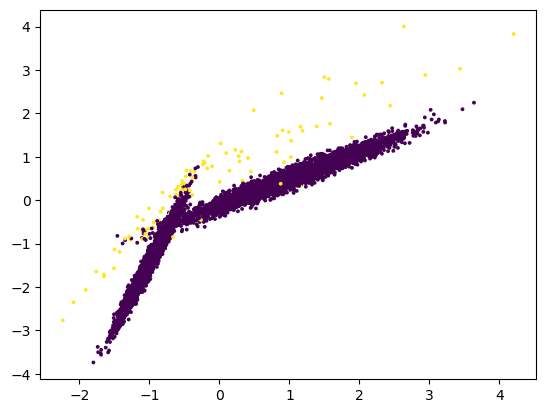

In [27]:
plt.figure()

plt.scatter(X[:,0],X[:,1],
            c= Y,
            s= 3)

plt.show()

# RandomUnderSampler

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
rus = RandomUnderSampler(sampling_strategy= 'majority')
X_us, Y_us = rus.fit_resample(X, Y)

(array([0, 1]), array([100, 100], dtype=int64)) 



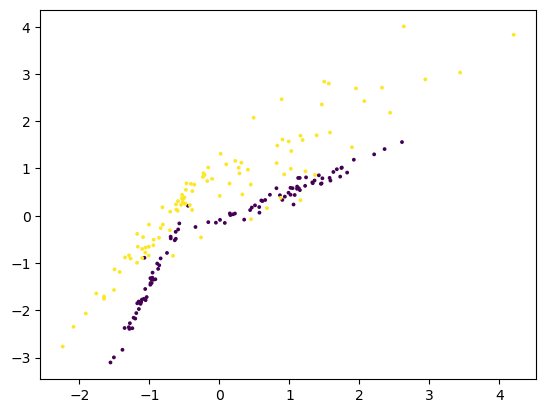

In [31]:
print(np.unique(Y_us, return_counts= True),'\n')

plt.figure()

plt.scatter(X_us[:,0],X_us[:,1],
            c= Y_us,
            s= 3)

plt.show()

(array([0, 1]), array([500, 100], dtype=int64)) 



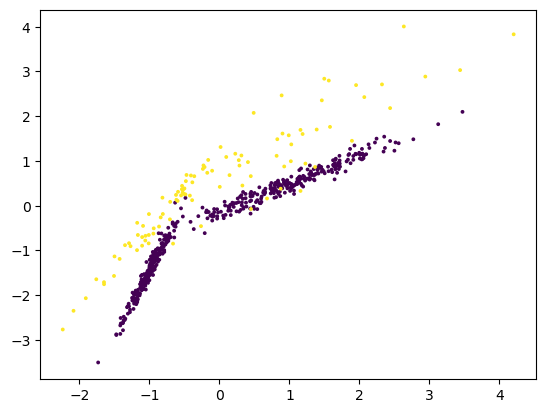

In [32]:
rus = RandomUnderSampler(sampling_strategy= 0.2) # 0.2 = 1/5 -> 5배
X_us, Y_us = rus.fit_resample(X, Y)

print(np.unique(Y_us, return_counts= True),'\n')

plt.figure()

plt.scatter(X_us[:,0],X_us[:,1],
            c= Y_us,
            s= 3)

plt.show()

## Over Sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# RandomOverSampler
같은 데이터를 여러개로 늘리는 방법

(array([0, 1]), array([9900, 9900], dtype=int64)) 



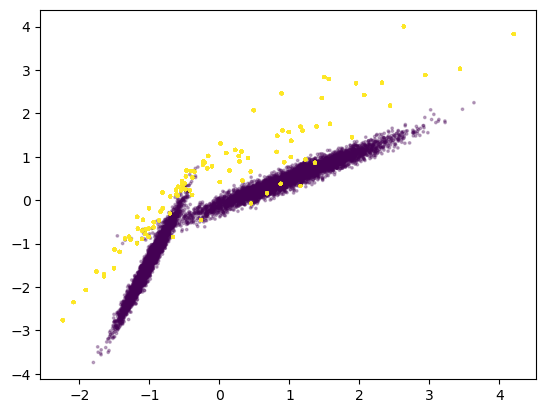

In [36]:
ros = RandomOverSampler(sampling_strategy= 'minority')
X_os, Y_os = ros.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

(array([0, 1]), array([9900, 4950], dtype=int64)) 



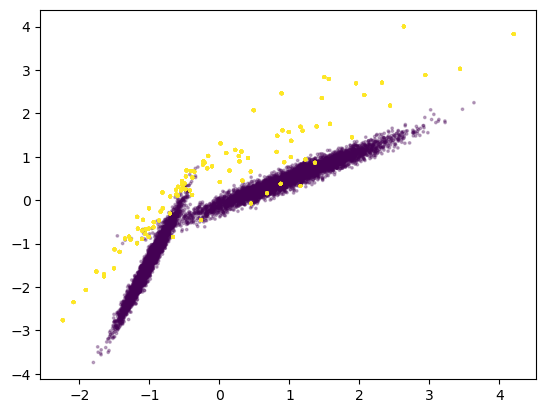

In [37]:
ros = RandomOverSampler(sampling_strategy= 0.5)
X_os, Y_os = ros.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

In [ ]:
* 하나의 데이터가 틀리면 해당 데이터로부터 늘어난 모든 데이터가 틀리는 문제 발생

# SMOTE ★★★★★
데이터를 보간법으로 늘려 RandomOverSampler의 단점을 극복

(array([0, 1]), array([9900, 9900], dtype=int64)) 



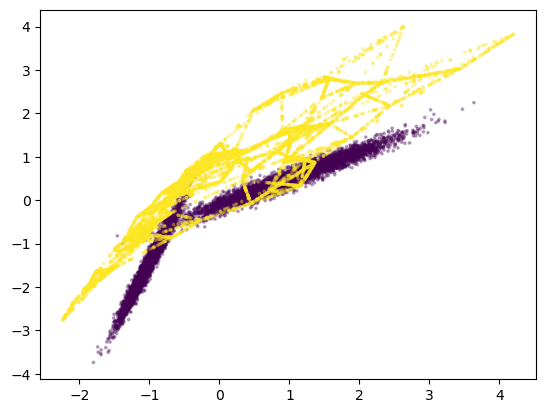

In [38]:
sm = SMOTE(sampling_strategy= 'minority')
X_os, Y_os = sm.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

(array([0, 1]), array([9900, 1980], dtype=int64)) 



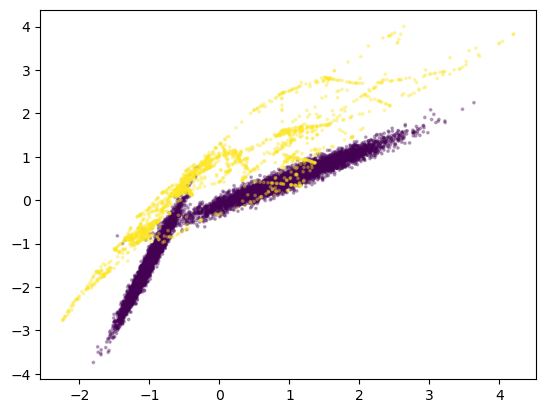

In [39]:
sm = SMOTE(sampling_strategy= 0.2)
X_os, Y_os = sm.fit_resample(X, Y)

print(np.unique(Y_os, return_counts= True),'\n')

plt.figure()

plt.scatter(X_os[:,0],X_os[:,1],
            c= Y_os,
            s= 3,
            alpha= 0.3)

plt.show()

In [ ]:
Data Description - application_record.csv
CODE_GENDER : 성별
FLAG_OWN_CAR : 차량 소유 여부
FLAG_OWN_REALTY : 부동산 소유 여부
CNT_CHILDREN : : 자녀 수
AMT_INCOME_TOTAL : 연간 총 소득(연봉)
NAME_INCOME_TYPE : 자금 출처(직업) - Working : 근로자, Commercial associate : 상업, etc...
NAME_EDUCATION_TYPE : 최종 학력
NAME_FAMILY_STATUS : 혼인 여부
NAME_HOUSING_TYPE : 거주 상태
DAYS_BIRTH : 태어난 후로부터 지난 일수 - ex) -12005 : 태어난지 12005일
DAYS_EMPLOYED : 고용 시작일로부터 지난 일수 - ex) -4542 : 일을 시작한지 4542일 +)양수 값은 실업자를 의미
FLAG_MOBIL : 가입할 때 휴대폰 번호를 기입했는지 여부 - ex) 0 : 휴대폰번호 제공을 거부한 사람
FLAG_WORK_PHONE : 가입할 때 직장 전화번호를 기입했는지 여부
FLAG_PHONE : 가입할 때 집 전화번호를 기입했는지 여부
FLAG_EMAIL : 가입할 때 이메일 주소를 기입했는지 여부
OCCUPATION_TYPE : 직업 종류
CNT_FAM_MEMBERS : 가족 구성원 수

In [ ]:
Data Description - credit.csv¶
MONTHS_BALANCE
0 : 현재
-1 : 1달 전
-2 : 2달 전
...
STATUS : 연체 상태
X : 해당 월에 대출 없음
C : 정상 상환
숫자 : 월 ex) 0 : 1달 미만, 1 : 1달, 3 : 3달 ... 5 : 5달

In [28]:
pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/archive/credit_record.csv")
#c 상환여부 , 숫자 : 숫자만큼 밀림,  X 연체없음 


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [22]:
pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/archive/application_record.csv")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
